# 4. Data modeling

## Moments of distribution

**Literature:** Press etal. _Numerical Recipies_, Chapter 14.1

Moments are the sums of integer powers of data values $(x_1, x_2,
x_3, \dots, x_\mathrm{N})$. They characterize the distribution of
data values if the data shows a sufficiently strong tendency to 
cluster around some particular value.

### Mean

$1^{st}$ moment:

$$  <x> = \bar{x} = \frac{1}{N} \sum_{j=1}^N x_j  $$

### Variance/width

$2^{nd}$ moment:

$$ var(x_1, x_2, x_3, \dots, x_N) = \frac{1}{N-1} \sum_{j=1}^N (x_j - \bar{x})^2  $$

and related to that the standard deviation:

$$ \sigma(x_1, x_2, x_3, \dots, x_N) = \sqrt{var(x_1, x_2, x_3, \dots, x_N)} $$


###  Skew

The $3^{rd}$ moment indicates the asymmetry of the distribution in
terms of a tilt:

$$ skew(x_1, x_2, x_3, \dots, x_N) = \frac{1}{N} \sum_{j=1}^N
\left(\frac{x_j - \bar{x}}{\sigma}\right)^3 $$



### Function to calculate mean and std deviation

1. Write a function that will take an array of data values and calculates the mean and standard deviation. Add appropriate documentation and make sure
  that common user errors are escaped.
2. Extend the function with the optional capability to calculate the
  variance, standard deviation or skew.

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


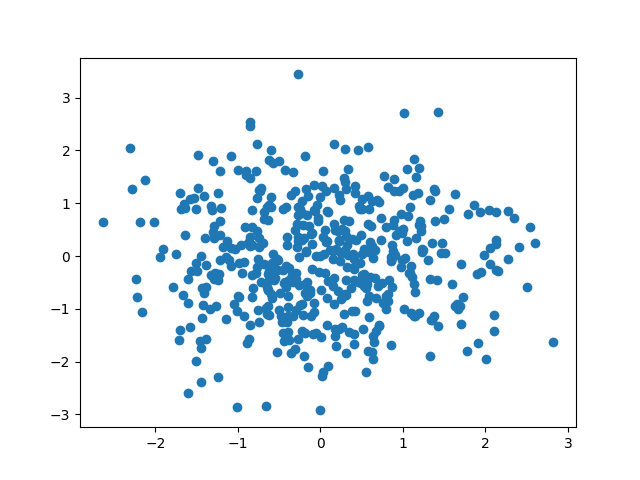

In [24]:
%pylab nbagg
ifig=1;close(ifig);figure(ifig)
a=random.standard_normal((2,500))
plot(a[0],a[1],'o')

<IPython.core.display.Javascript object>


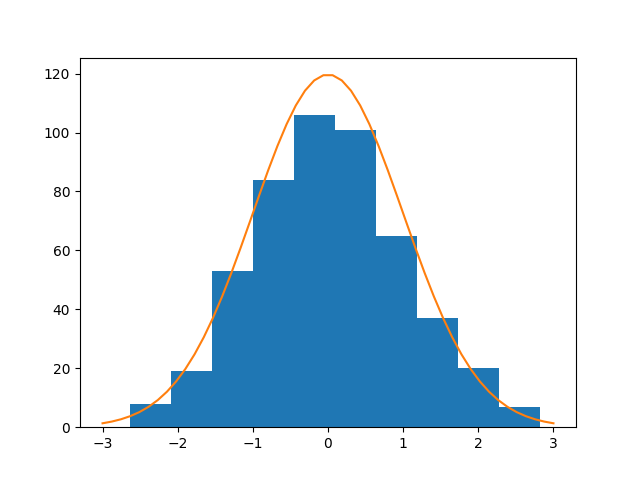

(array([   8.,   19.,   53.,   84.,  106.,  101.,   65.,   37.,   20.,    7.]),
 array([-2.63883767, -2.09241428, -1.5459909 , -0.99956751, -0.45314412,
         0.09327926,  0.63970265,  1.18612604,  1.73254942,  2.27897281,
         2.8253962 ]),
 <a list of 10 Patch objects>)

In [39]:
#ifig=2;close(ifig);figure(ifig)
ifig=2;figure(ifig)

hist(a[0],10)

#### Probability denisty of the normal distribution
$$ f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp -\frac{(x-\mu)^2}{2\sigma^2})$$
where $\mu$ is the mean, $\sigma$ is the standard deviation and $\sigma^2$ is the variance.

In [10]:
def pdf_normal(x,mu,var):
    thing = sqrt(2*pi*var)
    thang = -(x-mu)**2/(2.*var)
    return exp(thang)/thing

In [41]:
x = linspace(-3,3)
plot(x,(len(a[0])*6/10)*pdf_normal(x,0,1))

Normalization: $$\frac{(x_\mathrm{max}-x_\mathrm{in}) N}{n}$$ where $N$ is the number of points and $n$ is the number of bars in the histgram.

In [35]:
from scipy import integrate
integrate.cumtrapz(pdf_normal(x,0,1),x)[-1]

0.99726702871624917

In [47]:
def my_mean_var(x):
    N = len(x)
    m = sum(x)/N
    var = sum((x-m)**2)/(N-1)
    return m,var

In [49]:
my_mean_var(a[1])

(-0.050085898797938531, 1.069962469487862)

### Linear correlation

**Literature:** Press etal. _Numerical Recipies_, Chapter 14.5

If we know that two data sets are correlated than the linear correlation coefficient provides a measure of how well they are correlated. This is a different question than _Are the two data sets correlated?_ - and a slightly modified approach is needed to answer that question; see discussion Chapter 14.5, Numerical Recipes.

For $N$ pairs of values $(x_i,y_i)$ with $i=1 \dots N$ this coefficient (also called the product-moment correlation coefficient, or _Pearson's r_) is given by

$$ r = \frac{\sum_i (x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_i (x_i-\bar{x})^2}\sqrt{\sum_i (y_i-\bar{y})^2}}$$



##### Lab:
* add a function in your statistics module that provides the _Person's r_ coefficient for a correlated set of data pairs

### Fitting data with a model 

**Literature:** Press etal. _Numerical Recipies_, Chapter 15.1 - 15.2

#### $\chi$-square as merit function
Often we have some experimental data, and we have a physics based
model in the form of a simple equation that we expect to reproduce
trends observed in the data. The model contains undetermined
parameters, typically representing unresolved sub-grid physics.

Again, we have $N$ pairs of values $(x_i,y_i)$ with $i=1
\dots N$, and we have a model in the form
$$ y(x) = y(x; a_1 \dots a_M)$$

In order to determine the parameters $(a_1 \dots a_M)$ that
provide the _maximum likelyhood_ for the data to be a representation
of the model (specified by the parameter values $a_j$) we need to
adopt a _merit function_ that is arranged so that a minimum in the
merit function yields the _best-fit parameters_.

Such a _merit function_ may be based on the least-squares fit:

mimimize over the parameter values $a_j$:
$$ \sum_{i=1}^N [y_i -  y(x; a_1 \dots a_M) ]^2$$

However, this does not yet include the statistical error on each
$y_i$. Therefore we minimize instead over
$$\chi^2 =  \sum_{i=1}^N \left( \frac{y_i -  y(x; a_1 \dots a_M) }{\sigma_i}\right )^2 $$
where $\sigma_i$ is the standard deviation of the point $(x_i,y_i)$.

#### Fitting a straight line

The most simple model would involve a linear correlation
$$ y(x) = y(x; a, b) = a + bx$$



##### What is $\chi^2$ for this model?
$$
\chi^2(a,b) = \sum_{i=1}^N \left ( \frac{y_i - a - bx_i}{\sigma_i} \right )^2
$$

##### What are the parameters $a$ and $b$?
Derive a condition for $a$ and $b$ considering that $\chi^2$ has a minimum with respect to $a$ and $b$ when $\frac{\partial \chi^2}{\partial a} = 0$ and $\frac{\partial \chi^2}{\partial b} = 0$

With 
$$ S \equiv \sum_{i=1}^N \frac{1}{\sigma_i^2} $$
$$ S_x \equiv \sum_{i=1}^N \frac{x_i}{\sigma_i^2}\mathrm{,\ } S_y \equiv \sum_{i=1}^N \frac{y_i}{\sigma_i^2} $$
$$ S_{xx} \equiv \sum_{i=1}^N \frac{x_i^2}{\sigma_i^2}\mathrm{,\ } S_{xy} \equiv \sum_{i=1}^N \frac{x_i y_i}{\sigma_i^2} $$

we get

$$ aS +bS_x = S_y$$
$$ aS_x + b S_{xx} = S_{xy}$$

with the solution 

$$\Delta  \equiv SS_{xx} - (S_x)^2$$

$$a = \frac{S_{xx}S_y-S_xS_{xy}}{\Delta}$$

$$b = \frac{SS_{xy}S_y-S_xS_{y}}{\Delta}$$


##### Lab:
* Add a new function to your statistics module that implements $ \chi^2 $ fitting of a linear relationship to a correlated set of data pairs.


This is only the first step. We would also need to determine the _goodness-of-fit_.

## Least-square fitting of arbitrary curve

In [1]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [28]:
x=linspace(0,5,50)

<IPython.core.display.Javascript object>


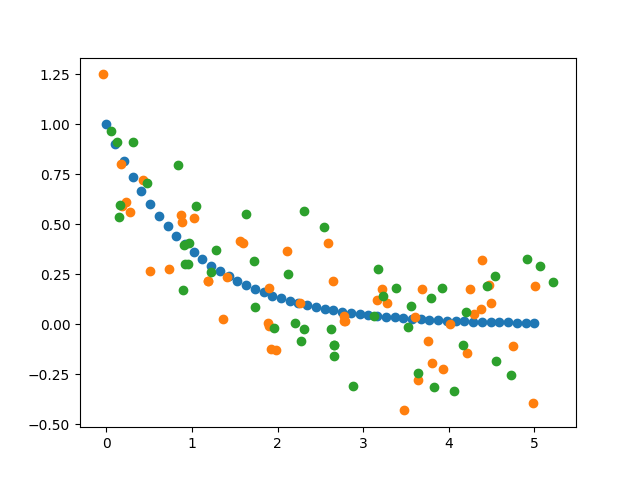

In [29]:
ifig=1;close(ifig);figure(ifig)
def func_explore(x):
    return exp(-x)
#    return x
plot(x,func_explore(x),'o')

In [31]:
noise_level=0.2
noisy_x=x+noise_level*randn(len(x))
noisy_y=func_explore(x)+noise_level*randn(len(x))
plot(noisy_x,noisy_y,'o')

<IPython.core.display.Javascript object>


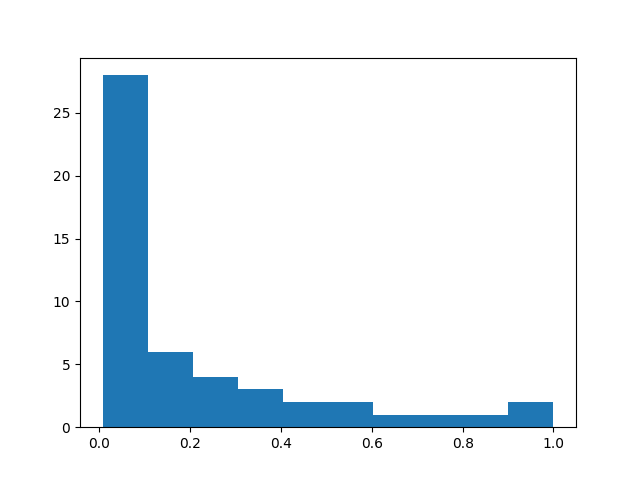

(array([ 28.,   6.,   4.,   3.,   2.,   2.,   1.,   1.,   1.,   2.]),
 array([ 0.00673795,  0.10606415,  0.20539036,  0.30471656,  0.40404277,
         0.50336897,  0.60269518,  0.70202138,  0.80134759,  0.90067379,  1.        ]),
 <a list of 10 Patch objects>)

In [32]:
close(3),figure(3)
hist(func_explore(x),10)

<IPython.core.display.Javascript object>


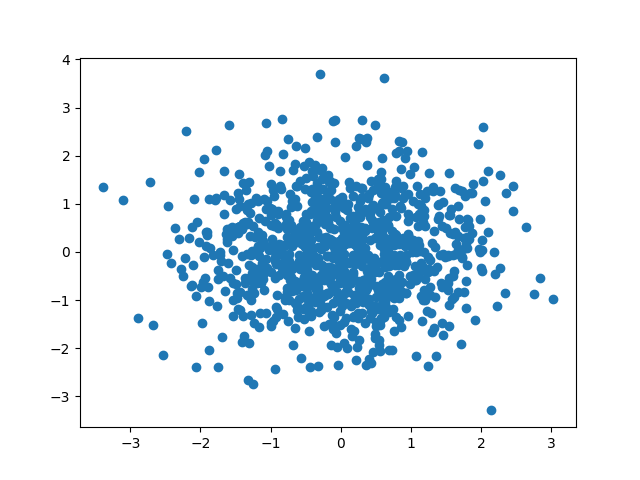

In [33]:
close(4),figure(4)
a=standard_normal((2,1000))
plot(a[0],a[1],'o')

In [11]:
from scipy.optimize import curve_fit
# curve_fit?

In [37]:
def model_func(x,a,b,c):
    return a*x**2+b*x+c
#    return a*exp(b*x)+c
fitpars, covmat = curve_fit(model_func,noisy_x,noisy_y,p0=[1.5,-1.5,0.1])

In [38]:
variances = covmat.diagonal()
std_devs = np.sqrt(variances)
print(fitpars,std_devs)

[ 0.07006648 -0.49455956  0.85665138] [ 0.0142724   0.07480262  0.08306046]


<IPython.core.display.Javascript object>


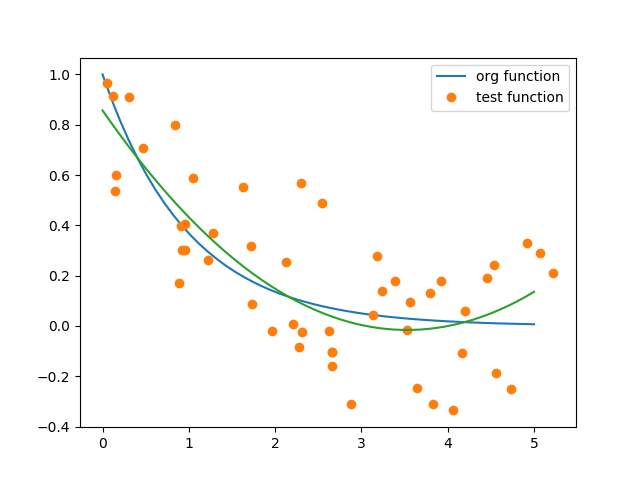

In [43]:
close(5),figure(5)

plot(x,func_explore(x),label='org function')     # original function that was used to produce the test data
plot(noisy_x,noisy_y,'o',label='test function')   # test data
plot(x,model_func(x,fitpars[0],fitpars[1],fitpars[2])) # fitted model function
legend(loc=0)

### Alternative libraries

There is another fitting method called `polyfit` in the `numpy` package. It is specifically designed to fit data with a power law. Another option is `numpy.linalg.lstsq`. You will have to try them, read the documentation of what algorithms they use, what limitations are specified and try to assess which methods best serves your needs.


## General steps involved in a computational physics problem
From this example we can identify the following steps involved in solving a computational physics problem:

1. Identify clearly the question.
   - this may sound like a trivial step, but in practise a lot of confusion later on can be avoided if the question or problem to be addressed is very clearly defined
2. Identify the relevant and important physics that needs to be considered. 
    - if the problem does not have radiation or magnetic fields, then don't include them; again this sounds trivial but still ...
3. Formulate the physics in an appropriate mathematical framework.
4. Chose a suitable difference scheme to represent the mathematical equation.
    - this step determines the numerical accuracy of the scheme
    - it says how well do the difference equations represent the mathematical equations
5. Chose the right solution scheme for the difference equation.
    - this will effect the stability of the numerical solution
    - it will determine how precisely the adopted solution represents the difference equation

## Verification and validation
A very important final step that often takes significant amount of time and effort is to _check if we get the right answer for the right reasons_. We need to do answer to fundamental questions:

1. Have I solved the right equations? This test is called **validation**.
2. Have I solved the equations right? This is called **verification**.

An important verification test is a numerical convergence study as well as comparison against analytical solutions. The only real validation test is the comparison with experimental data.

